
# ADASYN
Machine Learning with Imbalanced Data - Course

Creates new samples by interpolation of samples of the minority class and its closest neighbours. It creates more samples from samples that are harder to classify.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import ADASYN

## Create data
We will create 2 classes, one majority and one minority, clearly separated to facilitate the demo.

In [2]:
# config options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas columns
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced Xset
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=blobs_random_seed)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

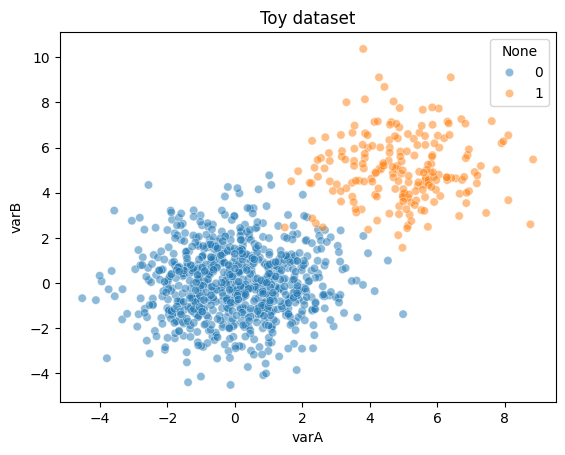

In [3]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y, alpha=0.5)

plt.title('Toy dataset')
plt.show()

## ADASYN

In [4]:
ada = ADASYN(
    sampling_strategy='auto',
    random_state=0,
    n_neighbors=5
)

X_res, y_res = ada.fit_resample(X, y)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X_res.shape, y_res.shape

((1598, 2), (1598,))

In [7]:
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    798
 Name: count, dtype: int64)

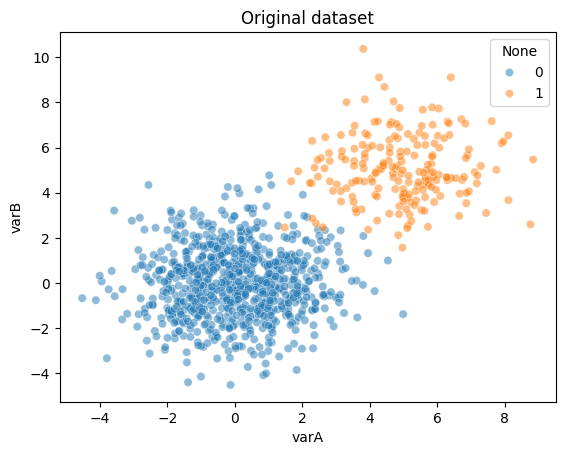

In [9]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

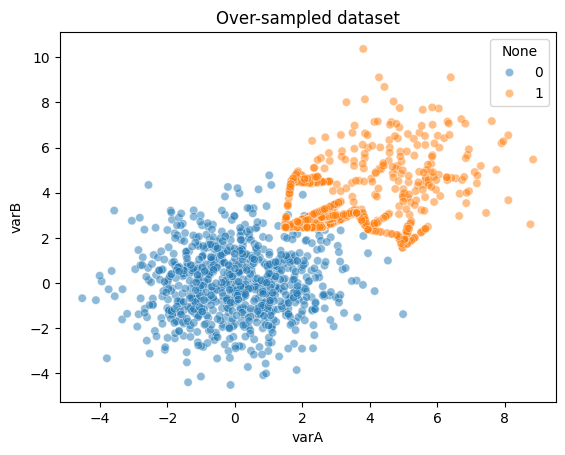

In [10]:
# plot of oversampled data

sns.scatterplot(
    data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()


There are now new observations that differ from the original ones. New observations sit at the boundary between the classes.